# Exploratory Data Analysis [ EDA ] - IMDB Movies Dataset

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')
font1 = {'family':'serif','color':'darkred','size':16}
font2 = {'family':'serif','color':'darkred','size':13}

### Load Movies Dataset 

In [499]:
data = pd.read_csv("IMDB-Movie-Data.csv")

### Look at the dataset frist 

In [501]:
data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


- This dataset presents a IMDB Movies with Metascore, Revenue, Votes, Rating, etc. 

### Find The Shape of Dataset 

In [504]:
print('shape of the dataset ::',data.shape)
print('Number of total Rows ::',data.shape[0])
print('Number of total Columns ::',data.shape[1])

shape of the dataset :: (1000, 12)
Number of total Rows :: 1000
Number of total Columns :: 12


- The dataset contains 1000 rows each row represents one unique IMDB Movie.
- The dataset has 12 columns, each describing a different attribute of a IMDB movie such as title, genre, actors, rating, etc

### Getting Information About Dataset

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


- The dataset contains 1000 movies with 12 attributes.
- It includes a balanced mix of numerical (ratings, revenue, runtime) and categorical (genre, director, actors) features.
- The dataset is clean, structured, and analysis-ready.
- Minor missing values do not significantly affect overall insights.

### Check The Null Values & Drop Them

In [510]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

- Dataset contain some NaN values in
- Revenue (Millions) -> Can be handle through mean() missing value imputation.
- Metascore -> Can be handle through mean() missing value imputation. 

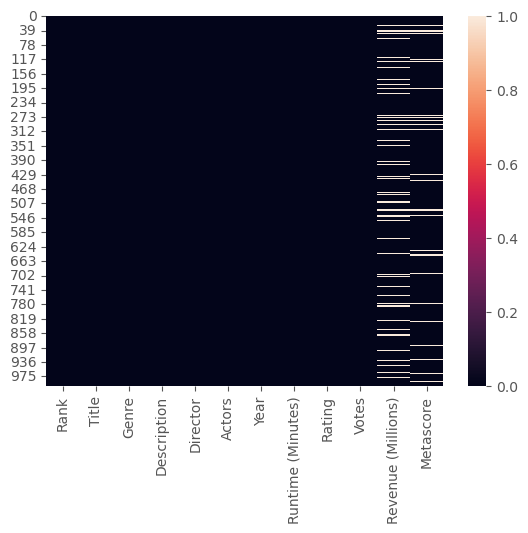

In [512]:
sns.heatmap(data.isnull())
plt.show()

In [513]:
data['Revenue (Millions)'] = data['Revenue (Millions)'].fillna(data['Revenue (Millions)'].mean())
data['Metascore'] = data['Metascore'].fillna(data['Metascore'].mean())
data.isnull().sum().any()

False

### Check For Duplicate Data If any Drop Them 

In [515]:
data.duplicated().any()

False

### Get Overall Satistics About Dataset 

In [517]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Display Title of the Movie Having Runtime >= 180 min

In [519]:
data[data['Runtime (Minutes)']>=180 ][['Rank', 'Title', 'Genre',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore']]

,Rank,Title,Genre,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime",180,8.2,865134,116.870000,75.000000
88,89,The Hateful Eight,"Crime,Drama,Mystery",187,7.8,341170,54.120000,68.000000
311,312,La vie d'Adèle,"Drama,Romance",180,7.8,103150,2.200000,88.000000
828,829,Grindhouse,"Action,Horror,Thriller",191,7.6,160350,25.030000,58.985043
965,966,Inland Empire,"Drama,Mystery,Thriller",180,7.0,44227,82.956376,58.985043


- Grindhouse (191 minutes) is the longest movie in this list.
- Despite its long duration, it has a moderate rating (7.6) and average revenue, indicating that longer runtime does not guarantee higher success.
- Movies with runtime ≥ 180 minutes are rare and mostly belong to drama-centric genres. While some long movies achieve both high ratings and revenue, runtime alone does not determine popularity or commercial success.

### Display the top 10 longest movies along with their runtime.

In [522]:
len_mov = data.sort_values(by='Runtime (Minutes)', ascending=False)[['Title', 'Runtime (Minutes)']].head(10)
len_mov

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
965,Inland Empire,180
311,La vie d'Adèle,180
82,The Wolf of Wall Street,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
36,Interstellar,169


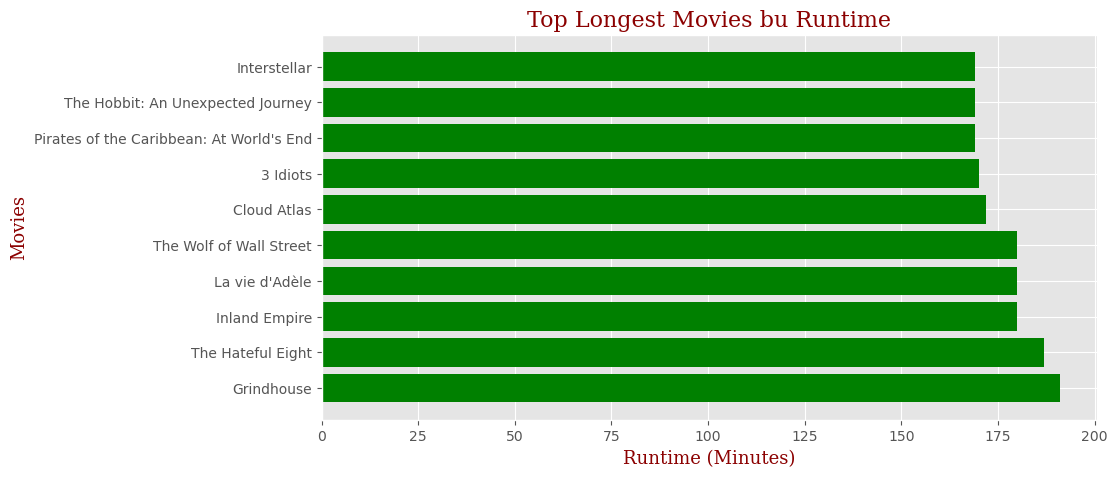

In [523]:
plt.figure(figsize=(10,5))
plt.barh(len_mov['Title'],len_mov['Runtime (Minutes)'],color='green')
plt.title("Top Longest Movies bu Runtime",fontdict=font1)
plt.xlabel("Runtime (Minutes)",fontdict=font2)
plt.ylabel("Movies",fontdict=font2)
plt.show()

- The longest movies in the dataset typically belong to drama, adventure, and epic genres. While very long runtimes are uncommon, well-crafted stories can successfully maintain audience interest beyond three hours.

### Display the number of movies released per year.
    

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64


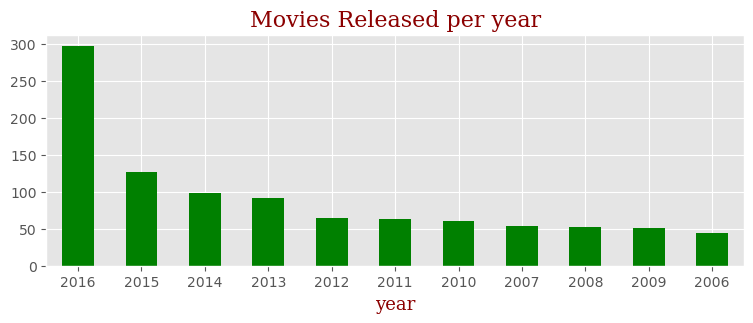

In [526]:
print(data['Year'].value_counts())
plt.figure(figsize=(9,3))
data['Year'].value_counts().plot(kind='bar',color='green')
plt.title("Movies Released per year",fontdict=font1)
plt.xlabel("year",fontdict=font2)
plt.xticks(rotation=0)
plt.show()

- Peak Year
   - 2016 has the highest number of movie releases (297 movies).
   - This indicates a significant rise in movie production in the mid-2010s.

- Upward Trend
   - There is a steady increase in the number of movies from 2006 to 2016.
   - The growth becomes more pronounced after 2012, reflecting expansion in the global film industry.

- Moderate Production Years
  -  Years like 2010–2013 show a balanced output (60–91 movies per year).
  -  These years represent a transition phase before the production boom.

- Earlier Years
  - 2006–2009 have comparatively fewer movies, suggesting limited production or lower dataset coverage for earlier years.

### Year-wise Trends
    Find the year with the highest average revenue.
    Find the average movie rating year-wise.

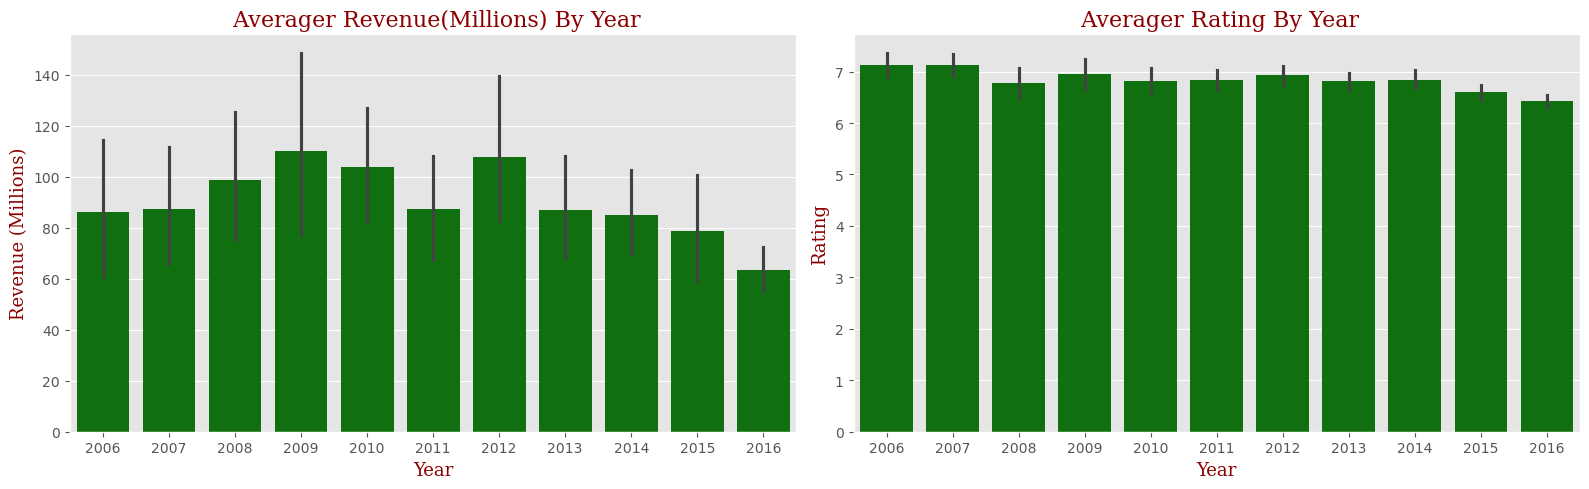


Year with the highest average revenue
 Year
2009    110.28
2012    107.97
2010    103.98
2008     98.77
2011     87.54
Name: Revenue (Millions), dtype: float64

Average movie rating year-wise Year
2007    7.13
2006    7.12
2009    6.96
2012    6.92
2011    6.84
2014    6.84
2010    6.83
2013    6.81
2008    6.78
2015    6.60
2016    6.44
Name: Rating, dtype: float64


In [529]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(x='Year',y='Revenue (Millions)',data=data,color='green')
plt.title(" Averager Revenue(Millions) By Year",fontdict=font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Revenue (Millions)",fontdict=font2)

plt.subplot(122)
sns.barplot(x='Year',y='Rating',data= data, color='green')
plt.title(" Averager Rating By Year",fontdict=font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Rating",fontdict=font2)
plt.tight_layout()
plt.show()

print("\nYear with the highest average revenue\n",data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False).round(2).head(5))
print("\nAverage movie rating year-wise",data.groupby('Year')['Rating'].mean().sort_values(ascending=False).round(2))

- 2009  recorded the highest average revenue of 110.28 million.
- Other high-performing years include
    - 2012 – 107.97M
    -  2010 – 103.98M 
    -  2008 – $98.77M 


- 2007 has the highest average rating (7.13), closely followed by 2006 (7.12).
- Ratings show a gradual decline over time, with:
- 2016 having the lowest average rating (6.44).

### Highest Average Voting and Metascore Year-wise

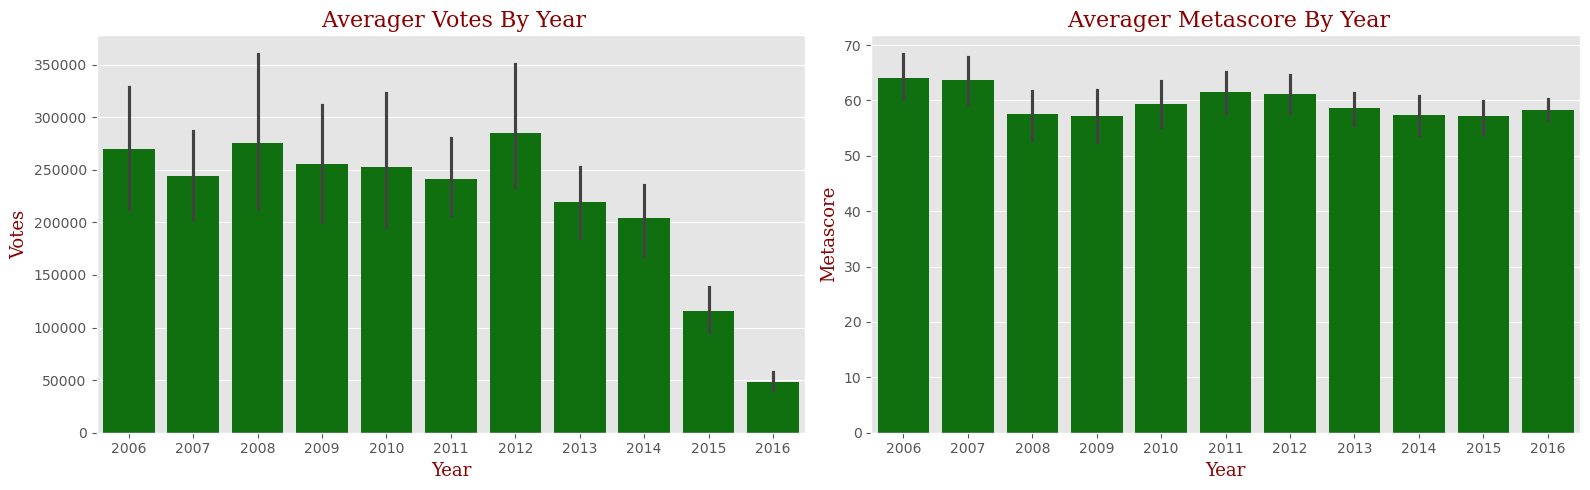


Highest Average Voting by Year
 Year
2012    285226.09
2008    275505.38
2006    269289.95
2009    255780.65
2010    252782.32
Name: Votes, dtype: float64

Highest Average Metascore by Year
 Year
2006    64.04
2007    63.77
2011    61.51
2012    61.08
2010    59.38
Name: Metascore, dtype: float64


In [533]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(x='Year',y='Votes',data=data,color='green')
plt.title(" Averager Votes By Year",fontdict=font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Votes",fontdict=font2)

plt.subplot(122)
sns.barplot(x='Year',y='Metascore',data= data, color='green')
plt.title(" Averager Metascore By Year",fontdict=font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Metascore",fontdict=font2)
plt.tight_layout()
plt.show()

print("\nHighest Average Voting by Year\n",data.groupby('Year')['Votes'].mean().sort_values(ascending=False).round(2).head(5))
print("\nHighest Average Metascore by Year\n",data.groupby('Year')['Metascore'].mean().sort_values(ascending=False).round(2).head(5))

- Highest Average Voting
  - 2012 has the highest average number of votes (≈285,226).
  - This indicates that movies released in 2012 received maximum audience engagement and popularity.
  - Years like 2008–2010 also show high voting, suggesting strong viewer interest during this period.

- Highest Average Metascore
    - 2006 recorded the highest average Metascore (≈64).
    - This implies that movies released in 2006 were better received by critics.
    - Early years (2006–2007) consistently show higher critical approval than later years.

### Rating Analysis
    - Find the overall average rating of movies.
    - Find the average rating for each director.
    - Classify movies based on rating:
        Excellent (≥ 8)
        Good (6–7.9)
        Average (< 6)

In [537]:
## overall average rating of movies.
avg_rating = data['Rating'].mean()
print(f"Average number of Rating :: {avg_rating:.2f}")

Average number of Rating :: 6.72


- The overall average rating of movies is 6.72.
- This indicates that, on average, movies in the dataset are above average in quality.
- Most films received moderately positive audience feedback, rather than extremely high or low ratings.

In [539]:
## average rating for each director.
data.groupby('Director')['Rating'].mean().sort_values(ascending=False).round(1)

Director
Nitesh Tiwari        8.8
Christopher Nolan    8.7
Olivier Nakache      8.6
Makoto Shinkai       8.6
Aamir Khan           8.5
                    ... 
Micheal Bafaro       3.5
Jonathan Holbrook    3.2
Shawn Burkett        2.7
James Wong           2.7
Jason Friedberg      1.9
Name: Rating, Length: 644, dtype: float64

- The dataset contains 644 unique directors, showing a wide diversity of filmmakers.
- Top-rated directors:
   - Nitesh Tiwari – 8.8 (highest average rating)
   - Christopher Nolan – 8.7
- These directors are known for consistently high-quality and well-received movies.
- Lowest-rated directors :
   - Jason Friedberg – 1.9
   - James Wong & Shawn Burkett – 2.7
- This shows that some directors have consistently poor audience ratings.

In [541]:
## Classify movies based on rating
def classify_rating(rating):
    if rating >= 8:
        return "Excellent"
    elif rating >= 6:
        return "Good"
    else:
        return "Average"
data['Rating_Category'] = data['Rating'].apply(classify_rating)
data[['Title', 'Rating', 'Rating_Category']].sample(5)

,Title,Rating,Rating_Category
311,La vie d'Adèle,7.8,Good
980,Miracles from Heaven,7.0,Good
990,Underworld: Rise of the Lycans,6.6,Good
606,Winter's Bone,7.2,Good
874,Life as We Know It,6.6,Good


In [542]:
data['Rating_Category'].value_counts()

Rating_Category
Good         738
Average      184
Excellent     78
Name: count, dtype: int64

- Majority of Movies Are “Good”
  - Nearly 74% of movies fall under the Good category.
  - This shows that most movies receive decent audience ratings.
- Few Excellent Movies
  - Only 78 movies are rated Excellent (rating ≥ 8).
  - This indicates that highly rated movies are relatively rare.
- Average-Rated Movies Are Limited
  - 184 movies are categorized as Average, suggesting fewer poorly rated films.
- Most movies fall into the Good category, while only a small proportion are rated Excellent, indicating that highly acclaimed movies are limited.

### Revenue & Popularity
    Find the most popular movie (highest revenue).
    Display the top 10 highest revenue movie titles.

In [545]:
##  popular movie (highest revenue)
data[data['Revenue (Millions)'] == data['Revenue (Millions)'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Category
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Excellent


- Star Wars: Episode VII – The Force Awakens is the most popular movie in the dataset as it earned the highest revenue, showing strong audience demand and massive commercial success.

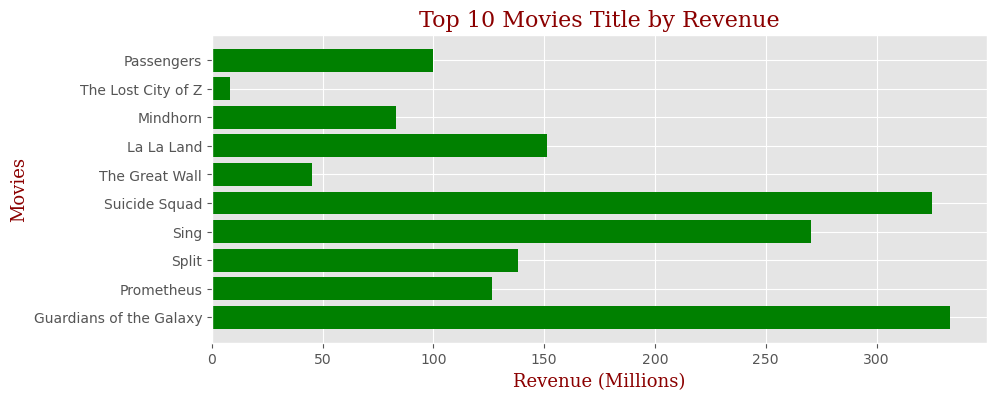


                                           Title  Revenue (Millions)
50   Star Wars: Episode VII - The Force Awakens              936.63
87                                       Avatar              760.51
85                               Jurassic World              652.18
76                                 The Avengers              623.28
54                              The Dark Knight              533.32
12                                    Rogue One              532.17
119                                Finding Dory              486.29
94                      Avengers: Age of Ultron              458.99
124                       The Dark Knight Rises              448.13
578             The Hunger Games: Catching Fire              424.65


In [547]:
## top 10 highest revenue movie titles
plt.figure(figsize=(10,4))
plt.barh(data['Title'].head(10),data['Revenue (Millions)'].head(10),color='green')
plt.title("Top 10 Movies Title by Revenue",fontdict=font1)
plt.ylabel("Movies",fontdict=font2)
plt.xlabel("Revenue (Millions)",fontdict=font2)
plt.show()

print("\n",data[['Title','Revenue (Millions)']].sort_values(by='Revenue (Millions)',ascending=False).head(10))

- The top 10 highest revenue movies are mostly franchise-based action and adventure films, indicating that brand value and sequels strongly influence box-office success.

### Find the Unique Values from Genre

In [550]:
list1 = []
for values in data['Genre']:
    list1.append(values.split(',')) 

In [551]:
unique_list = []
for item in list1:
    for item1 in item :
        if item1 not in unique_list:
            unique_list.append(item1)
unique_list            

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

### Display the number of movies for each genre

In [553]:
list2 = []
for values in data['Genre']:
    list2.append(values.split(','))

In [554]:
mov_list = []
for item in list2:
    for item1 in item:
        mov_list.append(item1)
Counter(mov_list)       

Counter({'Drama': 513,
         'Action': 303,
         'Comedy': 279,
         'Adventure': 259,
         'Thriller': 195,
         'Crime': 150,
         'Romance': 141,
         'Sci-Fi': 120,
         'Horror': 119,
         'Mystery': 106,
         'Fantasy': 101,
         'Biography': 81,
         'Family': 51,
         'Animation': 49,
         'History': 29,
         'Sport': 18,
         'Music': 16,
         'War': 13,
         'Western': 7,
         'Musical': 5})

- Most Common Genre
    - Drama (513 movies) is the most dominant genre.
    - This shows that storytelling and character-driven films are highly prevalent.
- Popular Commercial Genres
    - Action (303), Comedy (279), and Adventure (259) are also very common.
    - These genres are widely produced due to their mass audience appeal.
- Moderately Represented Genres
  - Genres like Thriller (195), Crime (150), and Romance (141) appear frequently but less than drama.
- Less Common / Niche Genres
    - Western (7) and Musical (5) have very few movies.
    - This indicates limited production or niche audience interest.

### Analyze whether movie rating affects revenue

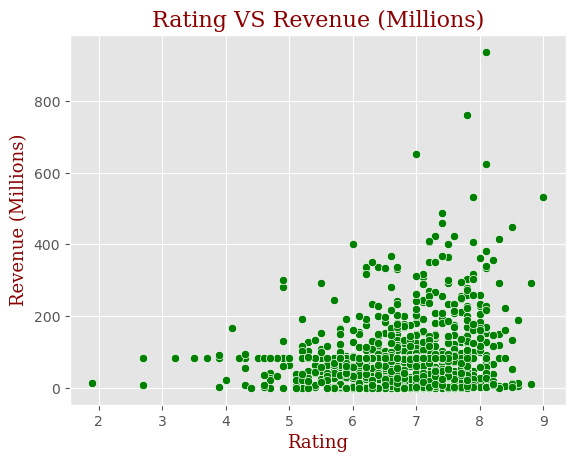


Relationship Between Rating and Revenue (Millions) :: 0.18952736366192596


In [557]:
sns.scatterplot(x=data['Rating'],y=data['Revenue (Millions)'],color='green')
plt.title("Rating VS Revenue (Millions)",fontdict=font1)
plt.xlabel("Rating",fontdict=font2)
plt.ylabel("Revenue (Millions)",fontdict=font2)
plt.show()

print("\nRelationship Between Rating and Revenue (Millions) ::",data['Rating'].corr(data['Revenue (Millions)']))

- The correlation between Rating and Revenue (Millions) is ≈ 0.19.
- There is a weak positive relationship between movie rating and revenue, showing that higher ratings do not strongly guarantee higher box-office earnings.